In [1]:
import numpy as np
from sklearn import linear_model, svm
from sklearn import isotonic
import networkx as nx
import math
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [4]:

data_X = []
data_y_colors = []
data_y_dsatur_colors = []
data_y_improvement = []
data_y_runtime = []
ends = ['chi1000', 'chi500', 'testset', 'dimacs']
stemX = 'C:/Users/pov_p/OneDrive - UC San Diego/Classes/CSE 291F/project/Data/clique_measurements/'
stem = 'C:/Users/pov_p/OneDrive - UC San Diego/Classes/CSE 291F/project/Code/readymade_heuristics/gCol/measurements/'

for e in tqdm(ends):
    f_X = open(stemX + e + '_X')
    for line in f_X:
        line = line.strip()
        arr = line.strip('][').split(', ')
        #print(arr)
        toAppend = list(map(float, arr))
        toAppend[5] /= (10 ** 9)
        data_X.append(toAppend)
    f_X.close()

    f_y = open(stem + 'AntCol/'+ e + '_y')
    f_y.readline()
    for line in f_y:
        arr = list(line.strip().strip('][').split(', '))
        print(arr)
        """
        # Mark all the 'None' ones to remove later
        data_y_colors.append(
             -1 if arr[1] == 'None' else int(arr[1])
        )
        data_y_dsatur_colors.append(
             -1 if arr[0] == 'None' else int(arr[0])
        )
        data_y_improvement.append(
             -1 if (arr[1] == 'None' or arr[0] == 'None') else int(arr[0]) - int(arr[1])
        )
        data_y_runtime.append(
            -1 if arr[2] == 'None' else math.log(float(arr[2]) + 1)
        )"""
    f_y.close()


    """
    f_y = open(stem + e + '_y')
    for line in f_y:
        if int(line.strip()) == 0:
            train_y.append(0)
            continue
        train_y.append(math.log(int(line.strip())))
    f_y.close()
    """


79875]']
['[120', '1006', '98804867]']
['[115', '862', '96179501]']
['[152', '776', '79349097]']
['[144', '760', '79018764]']
['[152', '722', '79044450]']
['[151', '735', '79103008]']
['[143', '713', '79163330]']
['[127', '942', '101818430]']
['[125', '908', '101238375]']
['[125', '854', '100101908]']
['[127', '915', '100555073]']
['[123', '887', '98545825]']
['[157', '766', '80256916]']
['[155', '681', '80516921]']
['[161', '662', '80213961]']
['[158', '716', '80784331]']
['[149', '720', '79470077]']
['[133', '943', '104161625]']
['[134', '611', '72144252]']
['[128', '864', '101803573]']
['[128', '893', '100949658]']
['[126', '933', '100091706]']
['[157', '720', '81321965]']
['[167', '728', '81538548]']
['[159', '731', '81734049]']
['[161', '797', '81649152]']
['[156', '730', '80983414]']
['[139', '625', '72933558]']
['[139', '606', '72983530]']
['[145', '569', '72088159]']
['[131', '893', '102921102]']
['[129', '865', '101045274]']
['[169', '824', '82515508]']
['[164', '731', '824897

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/pov_p/OneDrive - UC San Diego/Classes/CSE 291F/project/Code/readymade_heuristics/gCol/measurements/AntCol/testset_y'

In [3]:
print(len(data_X))

1617


In [4]:
# Clean x
i = 0
while i < len(data_X):
    if(data_y_runtime[i] == -1 or data_y_colors[i] == -1 or data_y_improvement[i] == -float('inf')):
        data_X.pop(i)
        data_y_runtime.pop(i)
        data_y_colors.pop(i)
        data_y_dsatur_colors.pop(i)
        data_y_improvement.pop(i)
    i += 1
#set(data_y_improvement)

In [5]:
r = list(range(len(data_X)))
random.seed(1)
random.shuffle(r)
train_X = []
train_y_improvement = []
train_y_colors = []
train_y_dsatur_colors = []
train_y_runtime = []
test_X = []
test_y_improvement = []
test_y_colors = []
test_y_dsatur_colors = []
test_y_runtime = []
for p in r:
    if random.random() < .25:
        test_X.append(data_X[p])
        test_y_improvement.append(data_y_improvement[p])
        test_y_runtime.append(data_y_runtime[p])
        test_y_colors.append(data_y_colors[p])
        test_y_dsatur_colors.append(data_y_dsatur_colors[p])
    else:
        train_X.append(data_X[p])
        train_y_improvement.append(data_y_improvement[p])
        train_y_runtime.append(data_y_runtime[p])
        train_y_colors.append(data_y_colors[p])
        train_y_dsatur_colors.append(data_y_dsatur_colors[p])

In [6]:
def predict_and_plot(mod, test_X, test_y, t):
    predictions = mod.predict(test_X)
    plt.plot(predictions, test_y, 'o', label = '(log(predicted), log(true))')
    plt.ylabel('log(True {})'.format(t))
    plt.xlabel('log(Predicted {})'.format(t))
    right = int(max(max(test_y), max(predictions))) + 2
    left = int(min(min(test_y), min(predictions)))
    return plt.plot(range(left, right), range(left, right), label = 'Perfect Prediction')

In [7]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor()

0.8711898469708452
[0.05405379 0.03343424 0.04774096 0.08449642 0.06779662 0.56410588
 0.14837209]


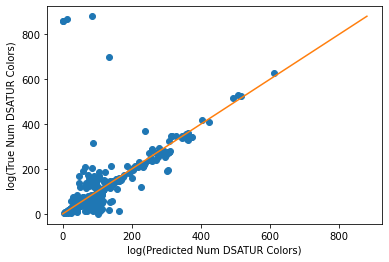

In [8]:
model = m.fit(train_X, train_y_dsatur_colors)
print(model.score(test_X, test_y_dsatur_colors))
print(model.feature_importances_)
#print(model.coef_ + [model.intercept_])
predict_and_plot(model, test_X, test_y_colors, 'Num DSATUR Colors')

0.9214289989877551
[0.03264136 0.0176751  0.02041    0.04691276 0.0309051  0.22456379
 0.62689188]


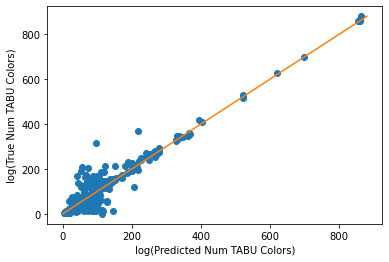

In [9]:
model = m.fit(train_X, train_y_colors)
print(model.score(test_X, test_y_colors))
print(model.feature_importances_)
#print(model.coef_ + [model.intercept_])
predict_and_plot(model, test_X, test_y_colors, 'Num TABU Colors')

0.9834861011509043
[0.02157844 0.00238523 0.00500813 0.00455583 0.02817621 0.03135533
 0.90694084]


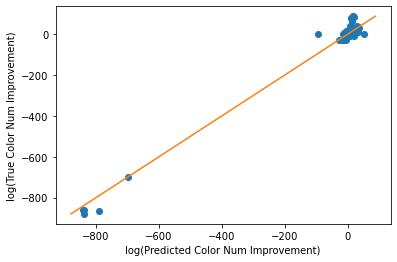

In [10]:
model = m.fit(train_X, train_y_improvement)
print(model.score(test_X, test_y_improvement))
print(model.feature_importances_)
predict_and_plot(model, test_X, test_y_improvement, 'Color Num Improvement')

0.6563936473140373
[0.02977503 0.03533837 0.02181896 0.12103546 0.16991752 0.10478332
 0.51733133]


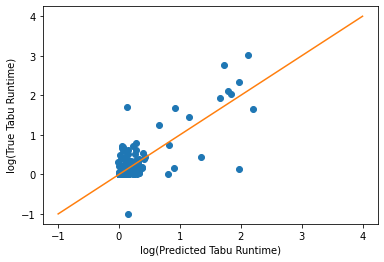

In [11]:
model = m.fit(train_X, train_y_runtime)
print(model.score(test_X, test_y_runtime))
print(model.feature_importances_)
predict_and_plot(model, test_X, test_y_runtime, 'Tabu Runtime')